## 워드클라우드
- 워드클라우드를 사용하여 지문의 중요 단어들 표시
- 이미지(해당 내용을 좀 더 부각) 위에 마스킹 처리하여서 시각화
- stopword 항목을 통해서 부적절한 용어 및 제거할 단어 제외 후 처리
- 연관어, 유사어 등 항목들을 구성하여 표현

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
import numpy as np
from PIL import Image

###### 파일 open(기본값 'r') - 자동으로 close 하기 위해 with open('') as f :

In [19]:
with open('./data/alice.txt') as f :
    text = f.read()
text[:100], len(text)

("Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of",
 145187)

In [20]:
# 이미지 마스킹
alice_mask = np.array(Image.open('./data/alice_mask.png'))
alice_mask.shape

(900, 900)

In [21]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [22]:
# 시각화 준비
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# 한글(폰트)처리
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


### 이미지 그리기

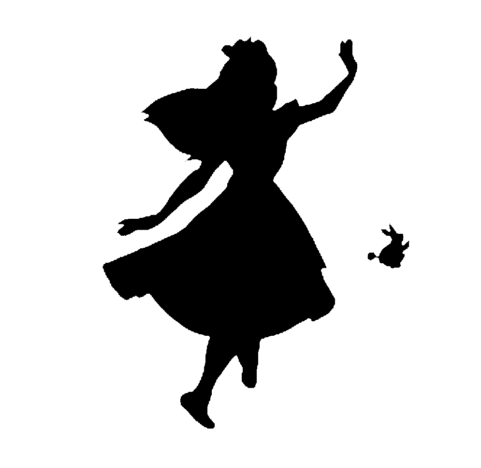

In [24]:
plt.figure(figsize=(8, 8))
# interpolation='bilinear': 이미지 처리에 중요
# 이중선형 보간법 설정, 1차원 선형보간법을 2차원으로 확장한다는 의미
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# 축 제거
plt.axis('off')
plt.show()

### STOPWORDS : 단어로 사용되지 않는 문자들을 모아둔 것

In [25]:
# 카운팅에 배제되는 단어
# 추가로 배제 가능
stopwords = set(STOPWORDS)
# 특정 단어를 추가하고 싶다면
stopwords.add('said')
len(stopwords)

191

###### WordCloud(background_color, max_words, mask, stopwords)

In [26]:
# 워드클라우드 생성
# 워드 카운트 기능 제공
wc = WordCloud(background_color = 'white',
              max_words = 2000,
              mask = alice_mask,
              stopwords = stopwords)

###### 워드카운트 : .generate()

In [27]:
# 워드카운트 수행
wc = wc.generate(text)

In [28]:
len(wc.words_), type(wc.words_)

(2000, dict)

In [29]:
# 최대 빈도 단어를 1.0으로 두고, 나머지는 0까지 정규화
wc.words_
'''
{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
'''

"\n{'Alice': 1.0,\n 'little': 0.2958904109589041,\n 'one': 0.2602739726027397,\n 'know': 0.2465753424657534,\n 'went': 0.2273972602739726,\n 'thing': 0.2191780821917808,\n 'time': 0.21095890410958903,\n 'Queen': 0.20821917808219179,\n 'see': 0.18356164383561643,\n"

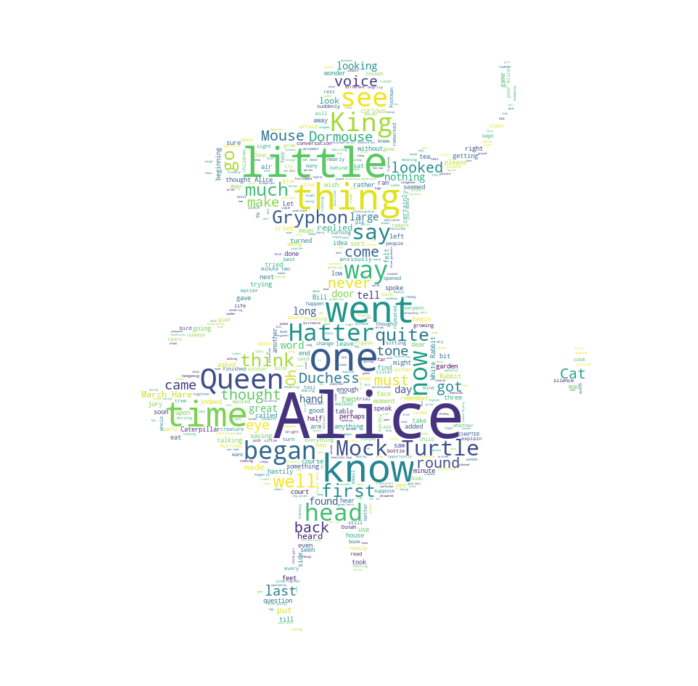

In [31]:
# 최종 시각화
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 스타워즈 텍스트

In [32]:
# 텍스트 원문
with open('./data/star_wars.txt') as f :
    text = f.read()

In [33]:
len(text), text[:100]

(326361,
 '\n\n                                        STAR WARS\n\n                                        Episode')

In [35]:
# 같은 단어인데 표현을 다양하게 해서 다르게 인식될 수 있다
text.find('HAN'), text.find('Han')

(113272, 113039)

###### 문자열 대체 : .replace(' ' , ' ')

In [36]:
text = text.replace('HAN', 'Han')

In [37]:
text.find('HAN'), text.find('Han')

(-1, 113039)

In [38]:
text.find("LUKE'S"), text.find('Luke')

(70466, 5405)

In [39]:
text = text.replace("LUKE'S", "Luke")

In [40]:
text.find("LUKE'S"), text.find('Luke')

(-1, 5405)

In [41]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

In [42]:
# 마스크 이미지 생성
mask_img = np.array(Image.open('./data/stormtrooper_mask.png'))

In [44]:
# 워드 생성
wc = WordCloud(mask = mask_img,
               max_words = 1000,
               stopwords = stopwords,
               margin = 10).generate(text)

In [45]:
tmp = wc.to_array()
tmp.shape

(1028, 1190, 3)

In [ ]:
wc.words_
'''
{'Luke': 1.0,
 'Han': 0.45904761904761904,
 'DEATH STAR': 0.4266666666666667,
 'THREEPIO': 0.37523809523809526,
 'Ben': 0.2914285714285714,
 'ship': 0.21523809523809523,
 'Leia': 0.2019047619047619,
 'one': 0.18285714285714286,
 'look': 0.16952380952380952,
 'RED LEADER': 0.16952380952380952,
'''

In [48]:
import random
# random.randint(80, 100) : 80 ~ 100 사이
def color_func(word, font_size, position, orientation, random_state=None, **kwargs) :
    return 'hsl(178, 235%%, %d%%)' % random.randint(80, 100)

###### 색상을 재구성 : .recolor(color_func= )

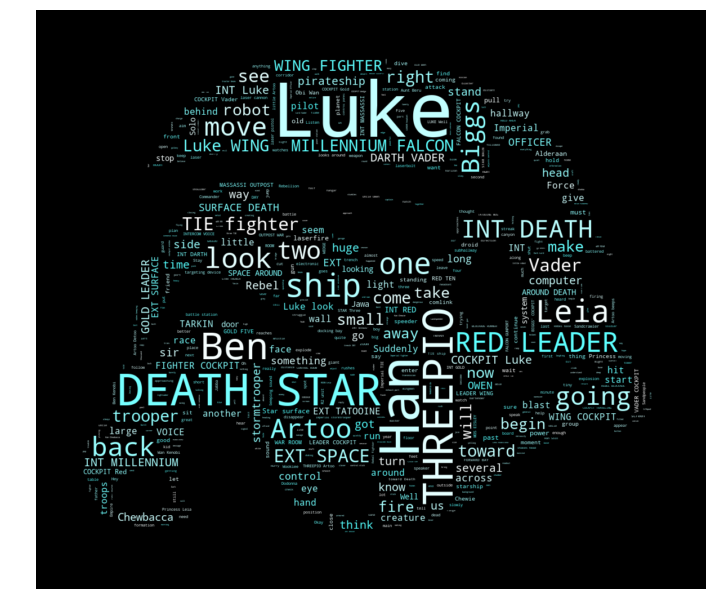

In [63]:
# 시각화
plt.figure(figsize=(12, 12))
# recolor -> 색상을 재구성
plt.imshow(wc.recolor(color_func = color_func, random_state=4), interpolation='bilinear')
plt.axis('off')
plt.show()